In [18]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

In [133]:
alphas=[0.5, 1]#, 1, 2]
folders={}
for alpha in alphas:
    folders[str(alpha)]=f"/vol/euclid6/euclid6_ssd/sven/threepoint_with_laila/Map3_Covariances/LognormalFields_alpha_{alpha:.1f}/"

N = 4
Nlos=4096
ixs = []
for i in range(N):
    for j in range(i, N):
        for k in range(j, N):
            ix = i*N**2+j*N+k
            ixs.append(ix)

In [134]:
map3s={}
for alpha in alphas:
    map3=np.load(folders[str(alpha)]+"map_cubed_from_gamma_npix_4096_fieldsize_10.npy")
    map3 = map3.reshape(N*N*N, Nlos)
    map3s[str(alpha)] = map3[ixs]

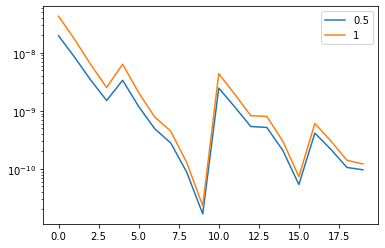

In [135]:
# Load slics cov
map3_slics=np.loadtxt("/vol/euclid6/euclid6_ssd/sven/threepoint_with_laila/Map3_Covariances/SLICS/map_cubed").T
cov_SLICS=np.cov(map3_slics)

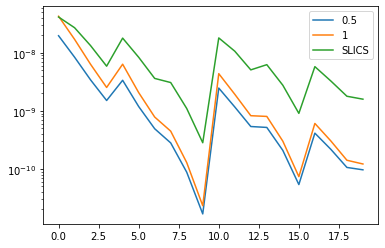

In [146]:
# Plot Map3 of log fields and SLICS
plt.yscale('log')
for alpha in alphas:
    mean=np.mean(map3s[str(alpha)], axis=1)
    plt.plot(mean, label=str(alpha))

plt.plot(np.mean(map3_slics, axis=1), label='SLICS')
plt.legend()

In [136]:
# Load slics-like GRF
map3_grf=np.load("/vol/euclid6/euclid6_ssd/sven/threepoint_with_laila/Map3_Covariances/GaussianRandomFields_slicslike/map_cubed_from_gamma_npix_4096_fieldsize_10.npy")
map3_grf = map3_grf.reshape(N*N*N, 4096)
map3_grf = map3_grf[ixs]
cov_grf=np.cov(map3_grf)

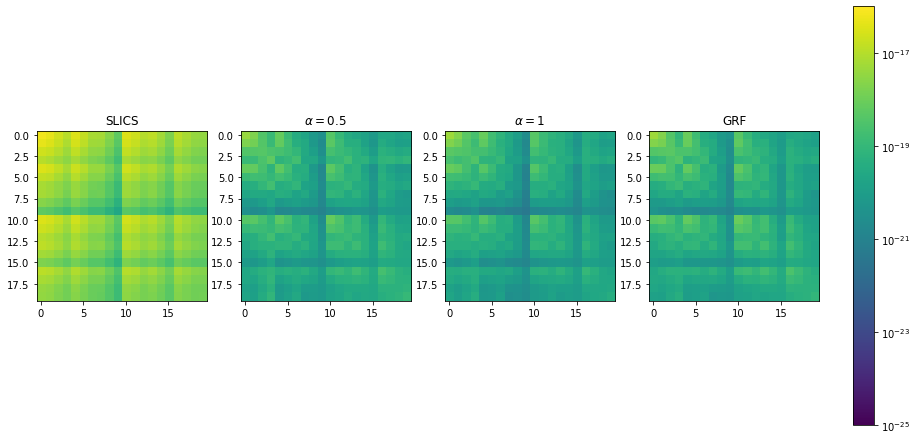

In [138]:
cov_alphas={}
fig, ax=plt.subplots(ncols=len(alphas)+2, figsize=(15,20))
ax[0].set_title("SLICS")
ax[0].imshow(cov_SLICS, norm=LogNorm(vmin=1e-25, vmax=1e-16))
for i,alpha in enumerate(alphas):
    cov=np.cov(map3s[str(alpha)])
    cov_alphas[str(alpha)]=cov
    ax[i+1].set_title(r"$\alpha=$"+str(alpha))
    im=ax[i+1].imshow(cov, norm=LogNorm(vmin=1e-25, vmax=1e-16))
ax[-1].set_title("GRF")
ax[-1].imshow(cov_grf, norm=LogNorm(vmin=1e-25, vmax=1e-16))

fig.colorbar(im, ax=ax.ravel().tolist(),fraction=0.025, pad=0.04)


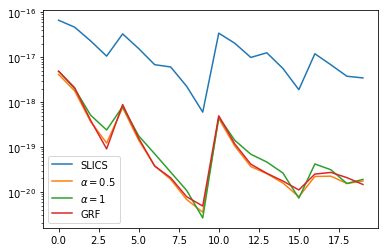

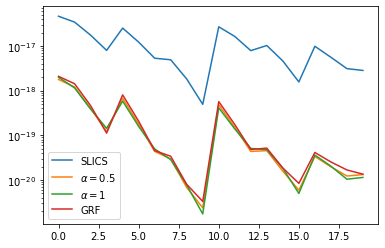

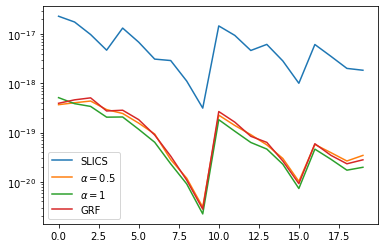

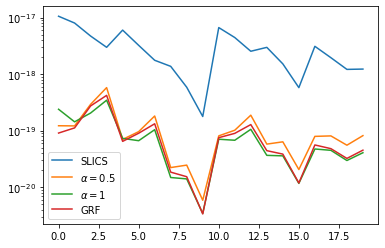

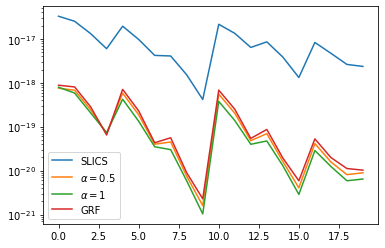

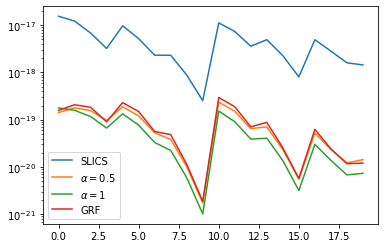

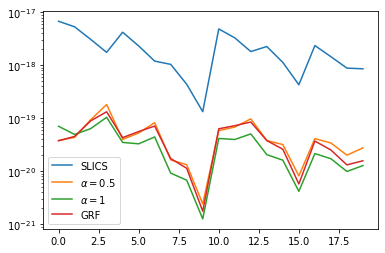

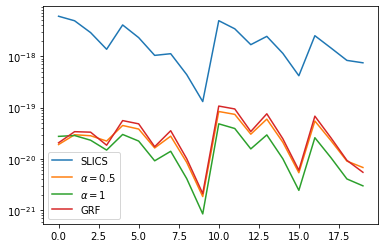

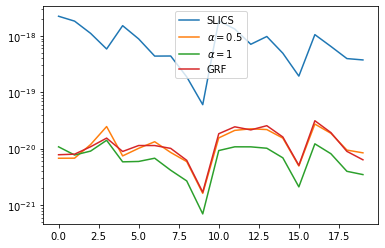

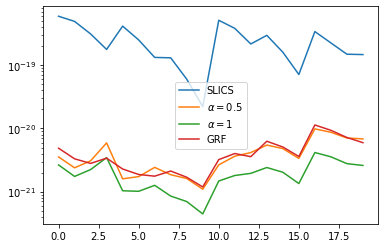

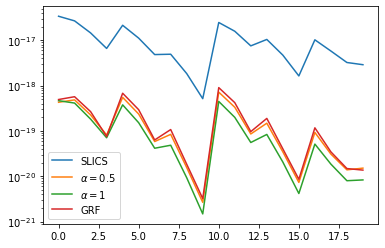

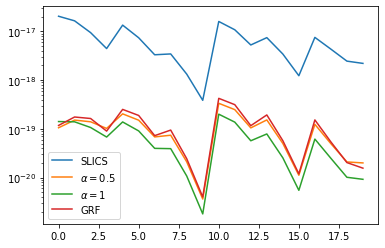

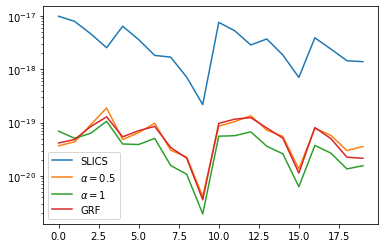

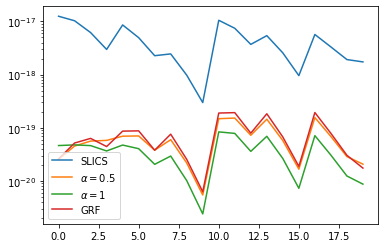

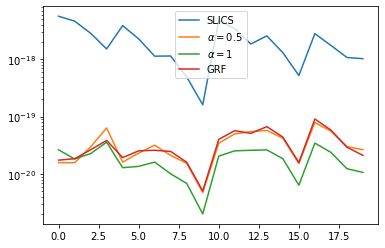

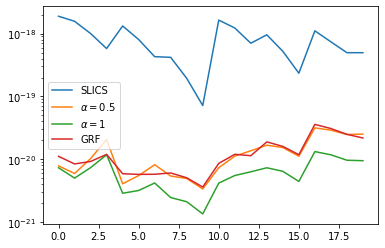

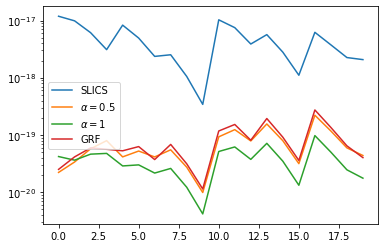

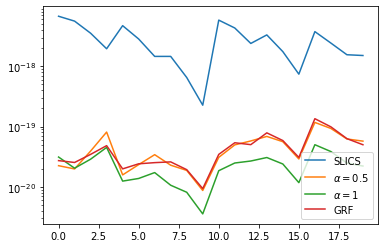

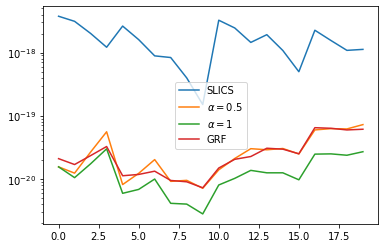

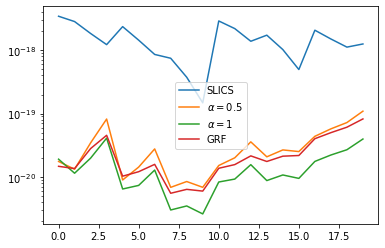

In [141]:
for i, line in enumerate(cov_SLICS):
    plt.figure()
    plt.yscale('log')
    plt.plot(line, label='SLICS')
    for alpha in alphas:
        plt.plot(cov_alphas[str(alpha)][i], label=r"$\alpha=$"+str(alpha))
    plt.plot(cov_grf[i], label='GRF')
    plt.legend()
    plt.show()

In [165]:
# Plot pdf of SLICS (single LOS)
from file_loader import get_kappa_slics, get_kappa_millennium
slics_kappa=get_kappa_slics(101)[0]



In [85]:
def lognormal(x, alpha, sigma):
    A=sigma/np.sqrt(np.exp(alpha*alpha)-1)
    p=np.log(x/A+1)+0.5*alpha*alpha
    p=p*p
    p=p/2/alpha/alpha
    p=np.exp(-p)/np.sqrt(2*np.pi)/alpha/(x+A)
    return p

In [101]:
def gauss(x, sigma):
    p=-x*x/2/sigma/sigma
    p=np.exp(p)/np.sqrt(2*np.pi)/sigma
    return p

/tmp/ipykernel_29979/1702097942.py:3: RuntimeWarning: invalid value encountered in log
  p=np.log(x/A+1)+0.5*alpha*alpha
/tmp/ipykernel_29979/1702097942.py:3: RuntimeWarning: invalid value encountered in log
  p=np.log(x/A+1)+0.5*alpha*alpha


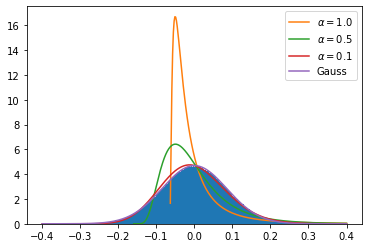

In [176]:

plt.hist(slics_kappa.ravel(), bins=400, range=(-0.4, 0.4), density=True)
x=np.linspace(-0.4, 0.4, num=400)
#x=np.linspace(-3, 3, num=400)

sigma=0.085

#plt.ylim(0, 2.5)
plt.plot(x,lognormal(x, alpha=1.0, sigma=sigma), label=r"$\alpha=1.0$")
plt.plot(x,lognormal(x, alpha=0.5, sigma=sigma), label=r"$\alpha=0.5$")
plt.plot(x,lognormal(x, alpha=0.1, sigma=sigma), label=r"$\alpha=0.1$")
plt.plot(x,gauss(x, sigma=sigma), label=r"Gauss")

plt.legend()